In [2]:
import numpy as np
import pandas as pd

Importing data and looking at the top 5 rows.

In [3]:
df = pd.read_csv('spotifytoptracks.csv', index_col= 0)
df.head(5)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


## Data Cleaning

This section will provide a guide how to handle missing values, remove duplicated and treat the outliers.


### Handling missing values

In [4]:
missing_values = df.isna().sum()
missing_values

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

There are no missing values in the data.

### Removing duplicates

When looking at the data there can be only same "artist" and "track_name" as a duplicate. Therefore, below codes checks if there are any such cases:

In [7]:
duplicate_rows = df[df.duplicated(subset=["artist", "track_name"])]
duplicate_rows
 

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre


There are no duplicates in the data.

### Treating outliers

This data has only 50 observations and removal of outliers would reduce the number even more, terefore, identified outliers will be capped with the lower or upper value.

Below columns were identified as the ones that migh have outliers:

In [9]:
columns_with_outliers = ["energy", "danceability", "loudness", "acousticness", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

Defining the lower and upper percentiles for capping:

In [10]:
lower_percentile = 0.05  
upper_percentile = 0.95  

Applying capping:

In [11]:
for column in columns_with_outliers:
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


## Exploratory data analysis

This section will provide basic statistics of the data.

How many observations are there in this dataset?

In [12]:
num_observations = len(df)
print('There are',num_observations,'observations in this data.')

There are 50 observations in this data.


How many features this dataset has?

In [13]:
num_features = len(df.columns)
print('There are',num_features,'features in this data.')

There are 16 features in this data.


Which of the features are categorical?

In [14]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features_str = str(categorical_features)
categorical_features_str = categorical_features_str[categorical_features_str.find('[')+1:categorical_features_str.rfind(']')]
print('Categorical features are:', categorical_features_str)

Categorical features are: 'artist', 'album', 'track_name', 'track_id', 'genre'


Which of the features are numeric?

In [15]:
numeric_features = df.select_dtypes(include='number').columns
numeric_features_str = str(numeric_features)
numeric_features_str = numeric_features_str[numeric_features_str.find('[')+1:numeric_features_str.rfind(']')]
print('Numeric features are:', numeric_features_str)

Numeric features are: 'energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'


Are there any artists that have more than 1 popular track? If yes, which and how many?

In [16]:
popular_artists = df['artist'].value_counts()
popular_artists = popular_artists[popular_artists > 1]
print('These artists have more than one popular song:',popular_artists)

These artists have more than one popular song: artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


Who was the most popular artist?

In [17]:
most_popular_artist = popular_artists.idxmax()
most_popular_tracks = popular_artists.max()
artists_with_same_popularity = popular_artists[popular_artists == most_popular_tracks]
print("Artists with the most osngs in the top 50:")
for artist in artists_with_same_popularity.index:
    print(artist)

Artists with the most osngs in the top 50:
Billie Eilish
Dua Lipa
Travis Scott


How many artists in total have their songs in the top 50?

In [18]:
total_artists = len(df['artist'].unique())
total_artists
print('There are',total_artists,'different artists in the TOP 50.')

There are 40 different artists in the TOP 50.


Are there any albums that have more than 1 popular track? If yes, which and how many?

In [19]:
popular_albums = df['album'].value_counts()
popular_albums = popular_albums[popular_albums > 1]
print("Albums with More than 1 Popular Track:\n", popular_albums)

Albums with More than 1 Popular Track:
 album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


How many albums in total have their songs in the top 50?

In [20]:
total_albums = len(df['album'].unique())
print("Total Albums with Songs in the Top 50:", total_albums)

Total Albums with Songs in the Top 50: 45


Which tracks have a danceability score above 0.7?

In [21]:
high_danceability_tracks = df[df['danceability'] > 0.7]
print("Tracks with Danceability > 0.7:\n", high_danceability_tracks['track_name'])

Tracks with Danceability > 0.7:
 1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                             

Which tracks have their loudness above -5?

In [22]:
high_loudness_tracks = df[df['loudness'] > -5]
print("Tracks with Loudness > -5:\n", high_loudness_tracks['track_name'])

Tracks with Loudness > -5:
 4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                  

Which tracks have their loudness below -8?

In [23]:
low_loudness_tracks = df[df['loudness'] < -8]
print("Tracks with Loudness < -8:\n", low_loudness_tracks['track_name'])

Tracks with Loudness < -8:
 7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object


Which track is the longest?

In [24]:
longest_track = df[df['duration_ms'] == df['duration_ms'].max()]
print("Longest Track:\n", longest_track[['track_name', 'duration_ms']])

Longest Track:
       track_name  duration_ms
15  Toosie Slide    246324.15
43       Safaera    246324.15
49    SICKO MODE    246324.15


Which track is the shortest?

In [25]:
shortest_track = df[df['duration_ms'] == df['duration_ms'].min()]
print("Shortest Track:\n", shortest_track[['track_name', 'duration_ms']])

Shortest Track:
                                        track_name  duration_ms
23                         Mood (feat. iann dior)    158040.25
37  Sunflower - Spider-Man: Into the Spider-Verse    158040.25
39                                        Ride It    158040.25


Which genre is the most popular?

In [71]:
most_popular_genre = df['genre'].value_counts().idxmax()
print("Most Popular Genre:", most_popular_genre)

Most Popular Genre: Pop


Which genres have just one song on the top 50?

In [27]:
genres_with_one_song = df['genre'].value_counts()[df['genre'].value_counts() == 1]
print("Genres with Just One Song:\n", genres_with_one_song)

Genres with Just One Song:
 genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


How many genres in total are represented in the top 50?

In [26]:
total_genres = len(df['genre'].unique())
print("Total Genres Represented:", total_genres)

Total Genres Represented: 16


Which features are strongly positively correlated?

In [28]:
numeric_features = df.select_dtypes(include='number')
corr_matrix = numeric_features.corr()
positive_corr = corr_matrix.unstack().sort_values().drop_duplicates()
strong_pos_corr = positive_corr[(positive_corr > 0.5) & (positive_corr < 1)]

print("Strongly Positively Correlated Features:\n", strong_pos_corr)

Strongly Positively Correlated Features:
 loudness  energy    0.779392
dtype: float64


Which features are strongly negatively correlated?

In [29]:
numeric_features = df.select_dtypes(include='number')
corr_matrix = numeric_features.corr()
negative_corr = corr_matrix.unstack().sort_values().drop_duplicates()
strong_neg_corr = negative_corr[(negative_corr < -0.5) & (negative_corr > -1)]

print("Strongly Negatively Correlated Features:\n", strong_neg_corr)

Strongly Negatively Correlated Features:
 energy  acousticness   -0.646967
dtype: float64


Which features are not correlated?

In [31]:
numeric_features = df.select_dtypes(include='number')
corr_matrix = numeric_features.corr()
uncorrelated_features = corr_matrix.unstack().sort_values().drop_duplicates()
uncorrelated_features = uncorrelated_features[(uncorrelated_features < 0.1) & (uncorrelated_features > -0.1)]
print("Uncorrelated Features:\n", uncorrelated_features)

Uncorrelated Features:
 liveness          duration_ms        -0.085155
                  loudness           -0.084439
speechiness       key                -0.079774
liveness          danceability       -0.073954
valence           liveness           -0.057963
danceability      duration_ms        -0.053753
duration_ms       valence            -0.036504
instrumentalness  energy             -0.033964
speechiness       loudness           -0.014151
valence           instrumentalness   -0.011315
key               loudness           -0.002883
danceability      instrumentalness   -0.002837
key               duration_ms         0.006829
valence           tempo               0.025644
tempo             liveness            0.034229
speechiness       instrumentalness    0.035198
instrumentalness  liveness            0.036014
valence           speechiness         0.047537
instrumentalness  tempo               0.051661
energy            duration_ms         0.056325
acousticness      instrumentalness  

### How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Text(0, 0.5, 'Mean Score')

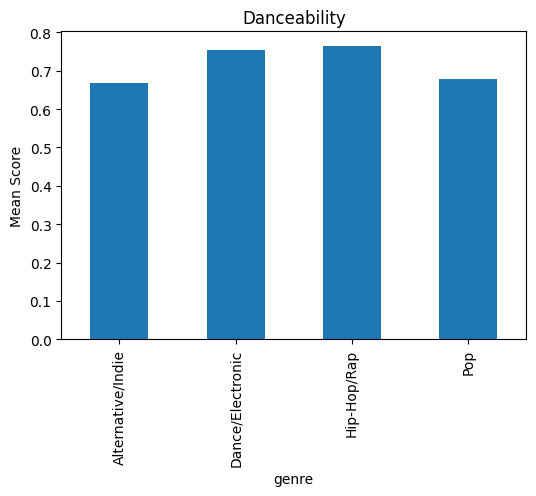

In [37]:
import matplotlib.pyplot as plt

selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
filtered_data = df[df['genre'].isin(selected_genres)]

genre_scores = filtered_data.groupby('genre').agg({'danceability': 'mean', 'loudness': 'mean', 'acousticness': 'mean'})

plt.figure(figsize=(6, 4))
genre_scores['danceability'].plot(kind='bar', title='Danceability')
plt.ylabel('Mean Score')

Danceability is recorded between 0 and 1. The higher the number the more people tend to dance. The mean score of danceability in four different groups of genre are quite high and similar. This means that why listening this type of music people tends to dance quite frequently. 

### How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Text(0, 0.5, 'Mean Score')

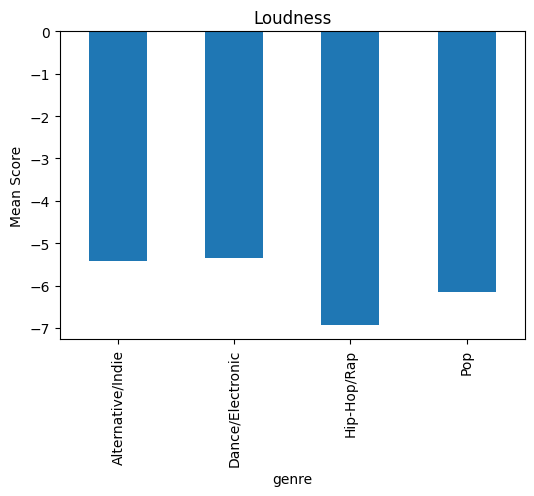

In [38]:
plt.figure(figsize=(6, 4))
genre_scores['loudness'].plot(kind='bar', title='Loudness')
plt.ylabel('Mean Score')

Loudness values are reported as negative numbers. This feature indicates the relative loudness of the track in decibel (dB). Higher absolute value means that song is louder.

From the graph we can see that all genres have quite similar loudness that fall bewtween -5 and -7. Hip-Hop/Rap and Pop tends to be slightly louder than Alternative/Indie and Dance/Electronic.

### How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

Text(0, 0.5, 'Mean Score')

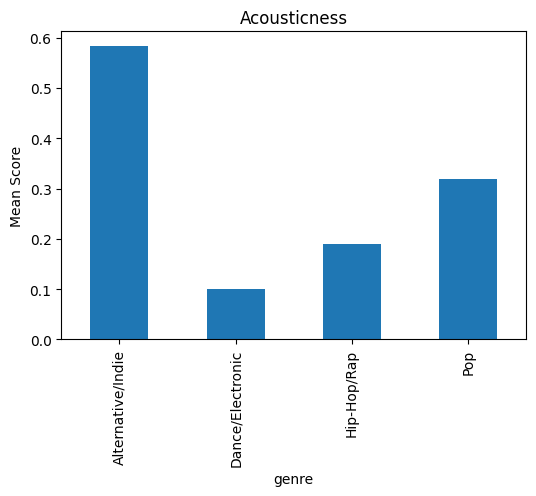

In [39]:
plt.figure(figsize=(6, 4))
genre_scores['acousticness'].plot(kind='bar', title='Acousticness')
plt.ylabel('Mean Score')

The value of accoustiness feature range from 0 to 1. This feature indicate the relative metric of the track being acoustic. Higher value means the song is more acoustic.

From the graph one can see that Alternative/Indie music genre has the highest acoustiness score while Dance/Electronic has the lowest.

### How analysis can be improved?

This analysis provides key statistics of the data, however, it can be improved by:

1. Performing statistical tests to identify outliers.
2. Performing statistical tests to check if the differences between the genres are statistically significant.
3. Add Top 50 data for different years/months to get better data sample for making conclusions.
4. More visualization can be added to better illustrate findings.